<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import json
import csv
from app_store_scraper import AppStore
from tqdm import tqdm
import os.path
import ast
import matplotlib.pyplot as plt

In [2]:
analysisDF = pd.read_csv("Analysis.csv")

In [3]:
analysisDF.head(10)

,App,Category,App Store Review,Play Store Review,Feature,label,Sentiment Scores IOS,Sentiment Score Android
0,Lumosity,Educational,I don’t mind paying for the premium subscripti...,It was really good for your brain excerise (in...,premium,NON-TECHNICAL/BUSINESS,"{'neg': 0.034, 'neu': 0.82, 'pos': 0.146, 'com...","{'neg': 0.133, 'neu': 0.73, 'pos': 0.137, 'com..."
1,Lumosity,Educational,I enjoyed the routine of playing Lumosity game...,This app is awesome but premium is expensive $...,premium,NON-TECHNICAL/BUSINESS,"{'neg': 0.051, 'neu': 0.74, 'pos': 0.209, 'com...","{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'comp..."
2,Lumosity,Educational,Please please please please! Release train of ...,This app is awesome but premium is expensive $...,premium,NON-TECHNICAL/BUSINESS,"{'neg': 0.045, 'neu': 0.684, 'pos': 0.271, 'co...","{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'comp..."
3,Spaces by Wix,Productivity Apps,If you read all these reviews....well I’m sorr...,If you want to create an app for your business...,easy,EFFICIENCY,"{'neg': 0.072, 'neu': 0.736, 'pos': 0.192, 'co...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
4,Spaces by Wix,Productivity Apps,Starting your own business is never easy. That...,If you want to create an app for your business...,easy,EFFICIENCY,"{'neg': 0.054, 'neu': 0.756, 'pos': 0.19, 'com...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
5,Spaces by Wix,Productivity Apps,I've seen and used other quick start websites ...,If you want to create an app for your business...,easy,EFFICIENCY,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
6,Spaces by Wix,Productivity Apps,I’m starting my own auto detailing company and...,Very solidified app along with a profitable an...,simple,EFFICIENCY,"{'neg': 0.048, 'neu': 0.917, 'pos': 0.035, 'co...","{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp..."
7,Spaces by Wix,Productivity Apps,I really like how easy it is for me to manage ...,If you want to create an app for your business...,easy,EFFICIENCY,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
8,Spaces by Wix,Productivity Apps,I really like using it for my personal trainin...,If you want to create an app for your business...,easy,EFFICIENCY,"{'neg': 0.076, 'neu': 0.617, 'pos': 0.307, 'co...","{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp..."
9,LinkedIn Learning,Educational,"Love the training material, but am I missing s...","video download speed poor, should default to l...",landscape,UI,"{'neg': 0.039, 'neu': 0.814, 'pos': 0.147, 'co...","{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'comp..."


In [4]:
appNames = analysisDF["App"].unique()

In [5]:
def getReviewAverage(reviewScoreArray):
    avgRes = {"neg": 0, "pos": 0, "neu": 0, "compound": 0}
    negSum = neuSum = posSum = cpdSum = 0
    for review in reviewScoreArray:
        reviewDict = ast.literal_eval(review)
        negSum += reviewDict['neg']
        neuSum += reviewDict['neu']
        posSum += reviewDict['pos']
        cpdSum += reviewDict['compound']
    avgRes["neg"] = negSum / len(reviewScoreArray)
    avgRes["neu"] = neuSum / len(reviewScoreArray)     
    avgRes["pos"] = posSum / len(reviewScoreArray)     
    avgRes["compound"] = cpdSum / len(reviewScoreArray)
    return avgRes

In [6]:
resultDF = pd.DataFrame()

In [7]:
for app in appNames:
    individualAppDF = analysisDF[analysisDF["App"] == app]
    iosSentimentScores = individualAppDF["Sentiment Scores IOS"]
    androidSentimentScores = individualAppDF["Sentiment Score Android"]
    iosReviewAverage = getReviewAverage(iosSentimentScores)
    androidReviewAverage = getReviewAverage(androidSentimentScores)
    labelSum = individualAppDF["label"].unique()
    dictToAdd = {
        "App": app,
        "Category": ",".join(individualAppDF["Category"].unique()),
        "label": ",".join(labelSum),
        "Feature": ",".join(individualAppDF["Feature"].unique()),
        "IOS Neg Score": iosReviewAverage["neg"],
        "Android Neg Score": androidReviewAverage["neg"],
        "IOS Pos Score": iosReviewAverage["pos"],
        "Android Pos Score": androidReviewAverage["pos"],
        "IOS Neu Score": iosReviewAverage["neu"],
        "Android Neu Score": androidReviewAverage["neu"],
        "IOS Compound Score": iosReviewAverage["compound"],
        "Android Compound Score": androidReviewAverage["compound"]
    }
    resultDF = pd.concat([resultDF, pd.DataFrame.from_records([dictToAdd])], ignore_index=True)

In [8]:
resultDF

,App,Category,label,Feature,IOS Neg Score,Android Neg Score,IOS Pos Score,Android Pos Score,IOS Neu Score,Android Neu Score,IOS Compound Score,Android Compound Score
0,Lumosity,Educational,NON-TECHNICAL/BUSINESS,premium,0.043333,0.044333,0.208667,0.155000,0.748000,0.800667,0.888500,0.255733
1,Spaces by Wix,Productivity Apps,EFFICIENCY,"easy,simple",0.041667,0.000000,0.200500,0.194833,0.757833,0.805167,0.756583,0.356733
2,LinkedIn Learning,Educational,"UI,EFFICIENCY,GRAPHICS,RESPONSIVENESS","landscape,UI,easy,slow",0.063429,0.151571,0.169571,0.131714,0.767143,0.716857,0.586229,-0.121114
3,Wordpress,Productivity Apps,EFFICIENCY,"Easy,easy,simple",0.038786,0.037429,0.224000,0.202286,0.737143,0.760214,0.781886,0.290536
4,Healthify Me,Health and Fitness,EFFICIENCY,"complex,confusing",0.191500,0.063000,0.028000,0.073000,0.780500,0.864000,-0.586000,0.038600
5,Notion,Productivity Apps,"EFFICIENCY,CRASHES,RESPONSIVENESS","simple,improvements,excellent,buggy,difficult,...",0.036111,0.109889,0.209889,0.145000,0.753889,0.745111,0.698678,0.061022
6,Fox News,News/ Information Outlet Apps,CRASHES,bug,0.070000,0.000000,0.125000,0.000000,0.805000,1.000000,0.653100,0.000000
7,DataCamp : Learn Data Science,Educational,EFFICIENCY,"intuitive,easy,simple,smooth,clean",0.012217,0.103217,0.290304,0.106217,0.697478,0.790565,0.766696,-0.023730
8,Six pack promise,Health and Fitness,"CRASHES,EFFICIENCY,NON-TECHNICAL/BUSINESS,RESP...","freezes,simple,reminders,great workouts,annoying",0.041875,0.117875,0.153625,0.160125,0.804625,0.722000,0.545650,0.210575
9,Merriam - Webster Dictionary,Educational,"EFFICIENCY,NON-TECHNICAL/BUSINESS","easy,amazing,smooth",0.008857,0.022286,0.230286,0.169429,0.760857,0.808286,0.949671,0.304814


In [9]:
resultDF.to_csv("AggregatedResult.csv", mode="a", index=False, header=True)

In [75]:
categories = resultDF['Category'].unique()

In [76]:
categories

array(['Educational', 'Productivity Apps', 'Health and Fitness',
       'News/ Information Outlet Apps', 'Lifestyle Apps',
       'Social Media Apps', 'Entertainment Apps',
       'Banking & Financial Apps'], dtype=object)

In [78]:
resultDF[resultDF['Category'] == categories[2]]

,App,Category,label,Feature,IOS Neg Score,Android Neg Score,IOS Pos Score,Android Pos Score,IOS Neu Score,Android Neu Score,IOS Compound Score,Android Compound Score
4,Healthify Me,Health and Fitness,EFFICIENCY,"complex,confusing",0.191500,0.063000,0.028000,0.073000,0.780500,0.864000,-0.586000,0.038600
8,Six pack promise,Health and Fitness,"CRASHES,EFFICIENCY,NON-TECHNICAL/BUSINESS,RESP...","freezes,simple,reminders,great workouts,annoying",0.041875,0.117875,0.153625,0.160125,0.804625,0.722000,0.545650,0.210575
12,Yoga-Go: Yoga for weight loss,Health and Fitness,EFFICIENCY,easy,0.000000,0.014000,0.249714,0.154571,0.750286,0.831429,0.863271,0.207857
17,BodyFast: Intermittent Fasting,Health and Fitness,"NON-TECHNICAL/BUSINESS,EFFICIENCY","premium,reminders,easy,Easy,reminder",0.032429,0.083857,0.253571,0.175143,0.713905,0.741000,0.791362,0.241771
22,StepsApp Predometer,Health and Fitness,NON-TECHNICAL/BUSINESS,track,0.022250,0.241000,0.196500,0.216000,0.781250,0.542000,0.908450,0.126300
34,Workout Planner muscle booster,Health and Fitness,EFFICIENCY,amazing,0.075000,0.000000,0.069000,0.590000,0.856000,0.410000,-0.113400,0.877200
35,Club Pilates,Health and Fitness,"EFFICIENCY,NON-TECHNICAL/BUSINESS,CRASHES","convenient,calendar,error,clean,bugs",0.056833,0.129000,0.175333,0.170833,0.767833,0.700167,0.524700,0.001133


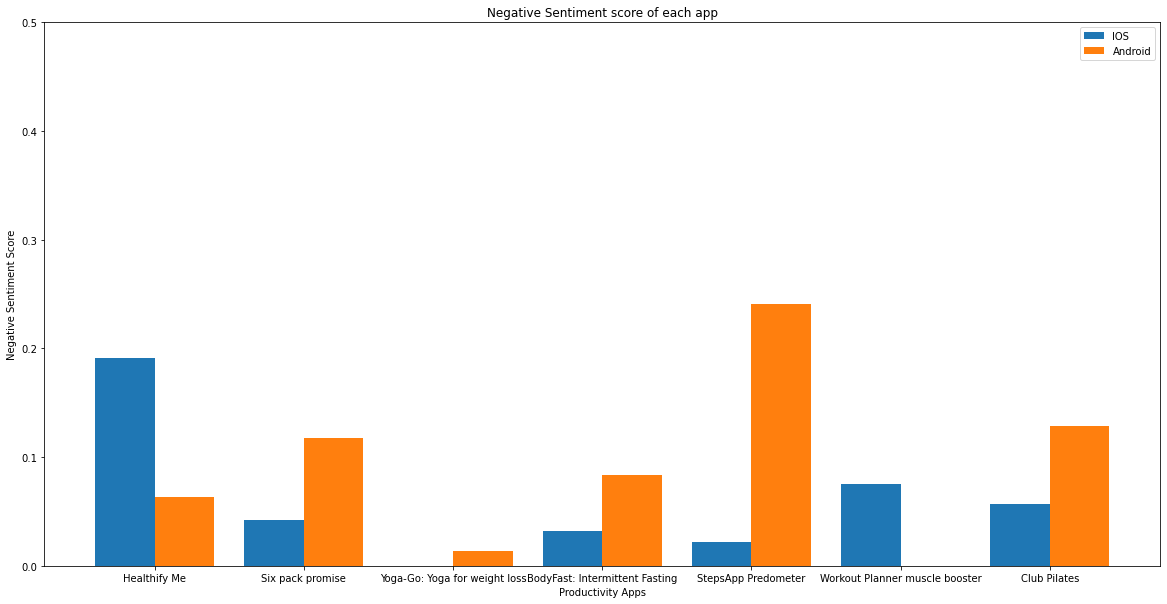

In [84]:
categoryDF = resultDF[resultDF['Category'] == categories[2]]
# Computing negative sentiment score
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

X = categoryDF["App"].to_numpy()
X_axis = np.arange(len(X))


plt.bar(X_axis - 0.2, categoryDF["IOS Neg Score"].to_numpy(), 0.4, label = 'IOS')
plt.bar(X_axis + 0.2, categoryDF["Android Neg Score"].to_numpy(), 0.4, label = 'Android')

br1 = np.arange(len(appNames))
br2 = [x + barWidth for x in br1]

plt.ylim(0, 0.5)
plt.xticks(X_axis, X)
plt.xlabel(categories[1])
plt.ylabel("Negative Sentiment Score")
plt.title("Negative Sentiment score of each app")
plt.legend()
plt.savefig("NegativeSentimentScore.png")
plt.show()


In [80]:
categoryDF.loc[categoryDF.App.isin(['MS Whiteboard','Jamboard','Dropbox','Proton mail'])].to_csv("negPos.csv")

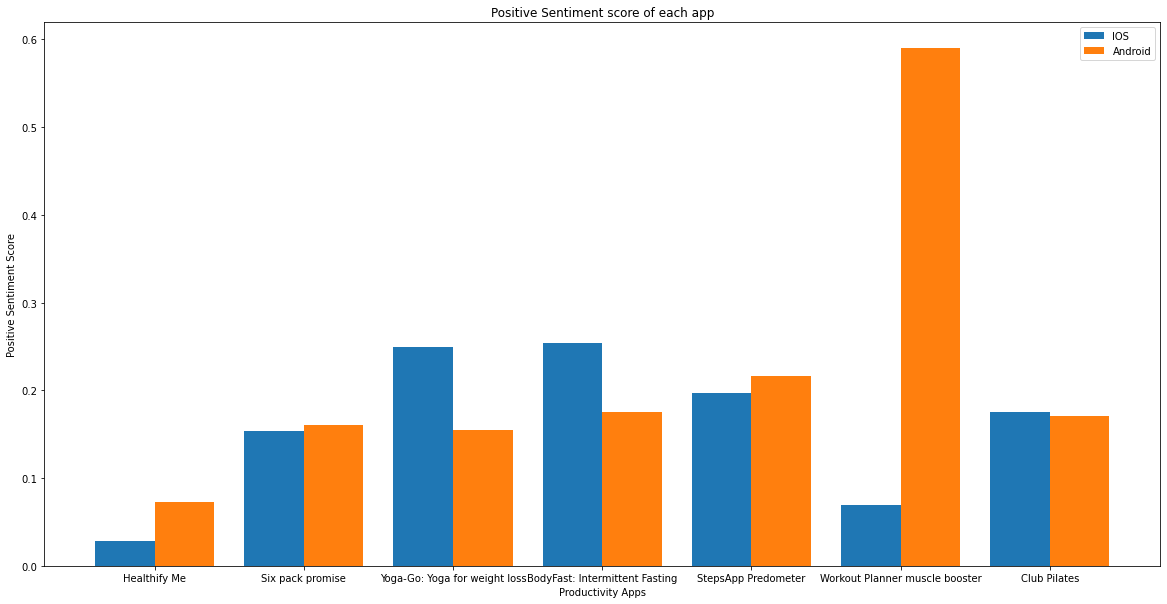

In [81]:
categoryDF = resultDF[resultDF['Category'] == categories[2]]
# Computing positive sentiment score
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10))

X = categoryDF["App"].to_numpy()
X_axis = np.arange(len(X))


plt.bar(X_axis - 0.2, categoryDF["IOS Pos Score"].to_numpy(), 0.4, label = 'IOS')
plt.bar(X_axis + 0.2, categoryDF["Android Pos Score"].to_numpy(), 0.4, label = 'Android')

br1 = np.arange(len(appNames))
br2 = [x + barWidth for x in br1]

plt.xticks(X_axis, X)
plt.xlabel(categories[1])
plt.ylabel("Positive Sentiment Score")
plt.title("Positive Sentiment score of each app")
plt.legend()
plt.savefig("PositiveSentimentScore.png")
plt.show()


In [82]:
categoryDF.head()

,App,Category,label,Feature,IOS Neg Score,Android Neg Score,IOS Pos Score,Android Pos Score,IOS Neu Score,Android Neu Score,IOS Compound Score,Android Compound Score
4,Healthify Me,Health and Fitness,EFFICIENCY,"complex,confusing",0.191500,0.063000,0.028000,0.073000,0.780500,0.864000,-0.586000,0.038600
8,Six pack promise,Health and Fitness,"CRASHES,EFFICIENCY,NON-TECHNICAL/BUSINESS,RESP...","freezes,simple,reminders,great workouts,annoying",0.041875,0.117875,0.153625,0.160125,0.804625,0.722000,0.545650,0.210575
12,Yoga-Go: Yoga for weight loss,Health and Fitness,EFFICIENCY,easy,0.000000,0.014000,0.249714,0.154571,0.750286,0.831429,0.863271,0.207857
17,BodyFast: Intermittent Fasting,Health and Fitness,"NON-TECHNICAL/BUSINESS,EFFICIENCY","premium,reminders,easy,Easy,reminder",0.032429,0.083857,0.253571,0.175143,0.713905,0.741000,0.791362,0.241771
22,StepsApp Predometer,Health and Fitness,NON-TECHNICAL/BUSINESS,track,0.022250,0.241000,0.196500,0.216000,0.781250,0.542000,0.908450,0.126300


In [56]:
playStoreFeatures = pd.read_csv("PlayStoreResults.csv")

In [55]:
appStoreFeatures = pd.read_csv("AppStoreResults.csv")

In [89]:
set(appStoreFeatures[appStoreFeatures['App'] == "MS Whiteboard"]['features'])

{'Easy', 'bugs|glitches', 'crash', nan, 'zoom'}

In [90]:
set(playStoreFeatures[playStoreFeatures['App'] == "MS Whiteboard"]['features'])

{'Crashes|placement',
 'High -|super cool and boost my productivity to the next level 🙏💛💖',
 'Smooth|whiteboard',
 'Super|laggy',
 'Unable to',
 'amazing',
 'awesome',
 'best',
 'black color|hard to',
 'blue|color',
 'colors',
 'colors|color',
 'color|color',
 'complex',
 'digital white',
 'drawing',
 'easy',
 'eraser',
 'expanding|whiteboard',
 'fill',
 'flawless',
 'flexible',
 'french',
 'glitches',
 'infinite',
 'integration',
 'lack features',
 'lag',
 'lag in',
 'limitations',
 'loading',
 'log in|whiteboard',
 nan,
 'new',
 'refresh',
 'scrolling',
 'simple|complicated',
 'slow',
 'slow|web view',
 'small',
 'syncing',
 'syncs',
 'sync|laggy',
 'undo',
 'unstable|heavy|smoothing',
 'useful|handy',
 'whiteboard',
 'whiteboards',
 'zoom'}

In [13]:
healthDF = resultDF[resultDF['Category'] == categories[2]]

In [14]:
healthDF

,App,Category,label,Feature,IOS Neg Score,Android Neg Score,IOS Pos Score,Android Pos Score,IOS Neu Score,Android Neu Score,IOS Compound Score,Android Compound Score
4,Healthify Me,Health and Fitness,EFFICIENCY,"complex,confusing",0.191500,0.063000,0.028000,0.073000,0.780500,0.864000,-0.586000,0.038600
8,Six pack promise,Health and Fitness,"CRASHES,EFFICIENCY,NON-TECHNICAL/BUSINESS,RESP...","freezes,simple,reminders,great workouts,annoying",0.041875,0.117875,0.153625,0.160125,0.804625,0.722000,0.545650,0.210575
12,Yoga-Go: Yoga for weight loss,Health and Fitness,EFFICIENCY,easy,0.000000,0.014000,0.249714,0.154571,0.750286,0.831429,0.863271,0.207857
17,BodyFast: Intermittent Fasting,Health and Fitness,"NON-TECHNICAL/BUSINESS,EFFICIENCY","premium,reminders,easy,Easy,reminder",0.032429,0.083857,0.253571,0.175143,0.713905,0.741000,0.791362,0.241771
22,StepsApp Predometer,Health and Fitness,NON-TECHNICAL/BUSINESS,track,0.022250,0.241000,0.196500,0.216000,0.781250,0.542000,0.908450,0.126300
34,Workout Planner muscle booster,Health and Fitness,EFFICIENCY,amazing,0.075000,0.000000,0.069000,0.590000,0.856000,0.410000,-0.113400,0.877200
35,Club Pilates,Health and Fitness,"EFFICIENCY,NON-TECHNICAL/BUSINESS,CRASHES","convenient,calendar,error,clean,bugs",0.056833,0.129000,0.175333,0.170833,0.767833,0.700167,0.524700,0.001133


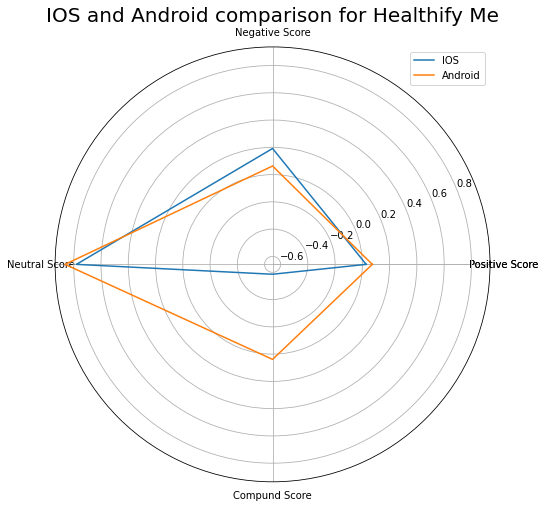

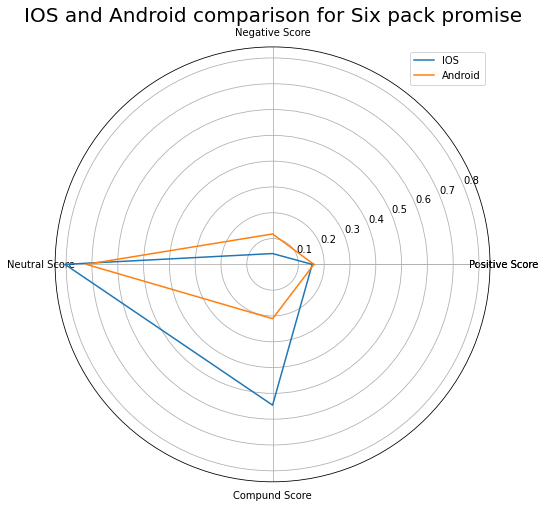

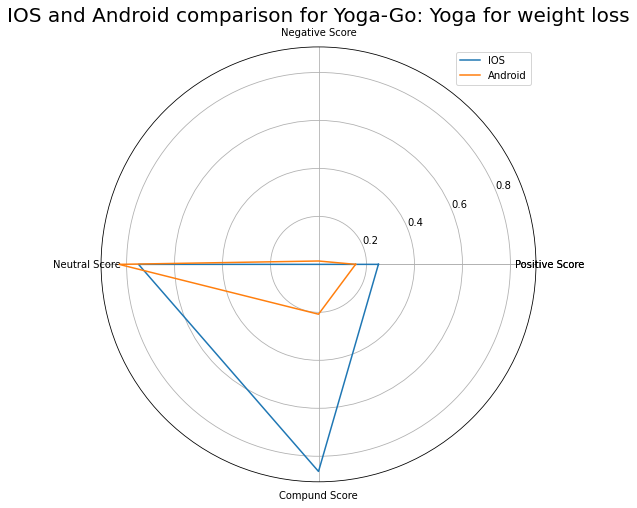

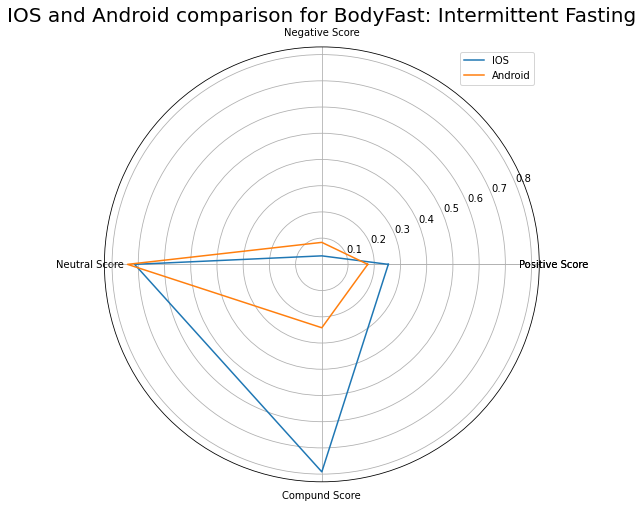

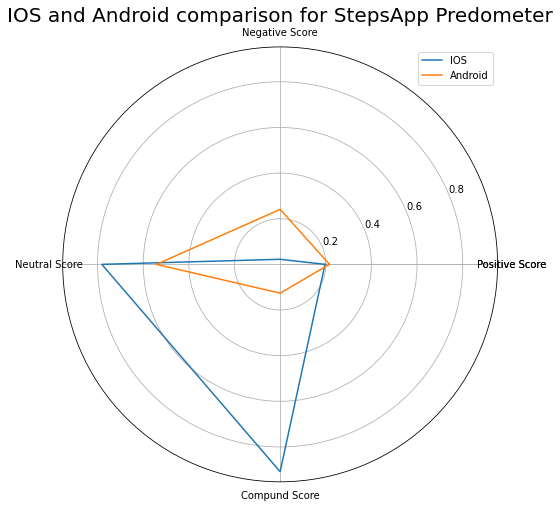

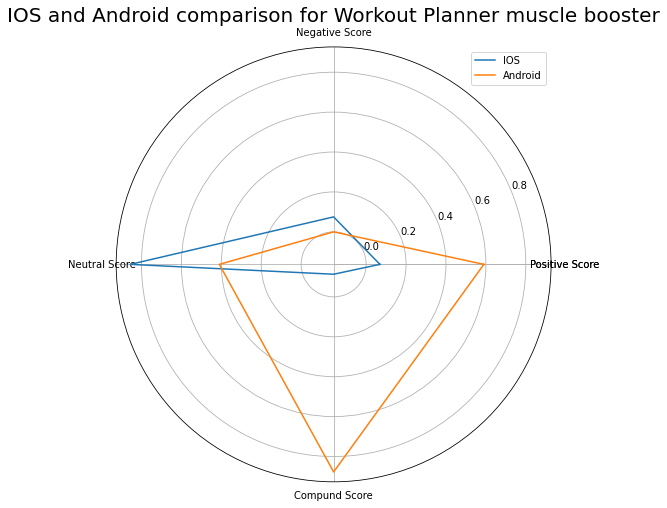

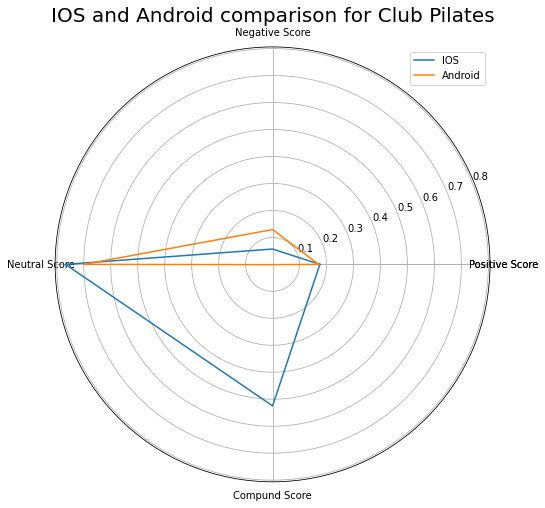

In [30]:
for app in healthDF["App"]:
    categories = ['Positive Score', 'Negative Score', 'Neutral Score', 'Compund Score']
    categories = [*categories, categories[0]]

    appIOS = [
        healthDF[healthDF["App"] == app]["IOS Pos Score"], 
        healthDF[healthDF["App"] == app]["IOS Neg Score"], 
        healthDF[healthDF["App"] == app]["IOS Neu Score"], 
        healthDF[healthDF["App"] == app]["IOS Compound Score"]
    ]
    appIOS = [*appIOS, appIOS[0]]
    appAndroid = [
        healthDF[healthDF["App"] == app]["Android Pos Score"], 
        healthDF[healthDF["App"] == app]["Android Neg Score"], 
        healthDF[healthDF["App"] == app]["Android Neu Score"], 
        healthDF[healthDF["App"] == app]["Android Compound Score"]
    ]
    appAndroid = [*appAndroid, appAndroid[0]]

    label_loc = np.linspace(start=0, stop=2* np.pi, num=len(appIOS))

    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)

    plt.plot(label_loc, appIOS, label='IOS')
    plt.plot(label_loc, appAndroid, label='Android')

    plt.title(f"IOS and Android comparison for {app}", size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()
#     plt.savefig(f'{app}.png')

In [16]:
# Difference between ios and android plot
differenceDF = pd.DataFrame()

appNames = resultDF['App'].unique()
for app in appNames:
    negDifference = abs(resultDF[resultDF['App'] == app]["IOS Neg Score"] - resultDF[resultDF['App'] == app]["Android Neg Score"])
#     print(negDifference)
    posDifference = abs(resultDF[resultDF['App'] == app]["IOS Pos Score"] - resultDF[resultDF['App'] == app]["Android Pos Score"])    
    neuDifference = abs(resultDF[resultDF['App'] == app]["IOS Neu Score"] - resultDF[resultDF['App'] == app]["Android Neu Score"])    
    cpdDifference = abs(resultDF[resultDF['App'] == app]["IOS Compound Score"] - resultDF[resultDF['App'] == app]["Android Compound Score"]) 
    dictToAdd = {
        "Category": ",".join(resultDF[resultDF['App'] == app]['Category'].unique()),
        "App": ",".join(resultDF[resultDF['App'] == app]["App"].unique()),
        "Label": ",".join(resultDF[resultDF['App'] == app]["label"].to_numpy()),
        "Feature": ",".join(resultDF[resultDF['App'] == app]["Feature"].to_numpy()),
        "Neg score diff": negDifference.to_numpy()[0],
        "Pos score diff": posDifference.to_numpy()[0],
        "Neu score diff": neuDifference.to_numpy()[0],
        "Compound score diff": cpdDifference.to_numpy()
    }
    differenceDF = pd.concat([differenceDF, pd.DataFrame.from_records([dictToAdd])], ignore_index=True)

In [17]:
differenceDF.head()

,Category,App,Label,Feature,Neg score diff,Pos score diff,Neu score diff,Compound score diff
0,Educational,Lumosity,NON-TECHNICAL/BUSINESS,premium,0.001000,0.053667,0.052667,[0.6327666666666667]
1,Productivity Apps,Spaces by Wix,EFFICIENCY,"easy,simple",0.041667,0.005667,0.047333,[0.39985000000000004]
2,Educational,LinkedIn Learning,"UI,EFFICIENCY,GRAPHICS,RESPONSIVENESS","landscape,UI,easy,slow",0.088143,0.037857,0.050286,[0.7073428571428572]
3,Productivity Apps,Wordpress,EFFICIENCY,"Easy,easy,simple",0.001357,0.021714,0.023071,[0.4913500000000001]
4,Health and Fitness,Healthify Me,EFFICIENCY,"complex,confusing",0.128500,0.045000,0.083500,[0.6246]


In [18]:
differenceDF.to_csv("difference.csv", index=False)

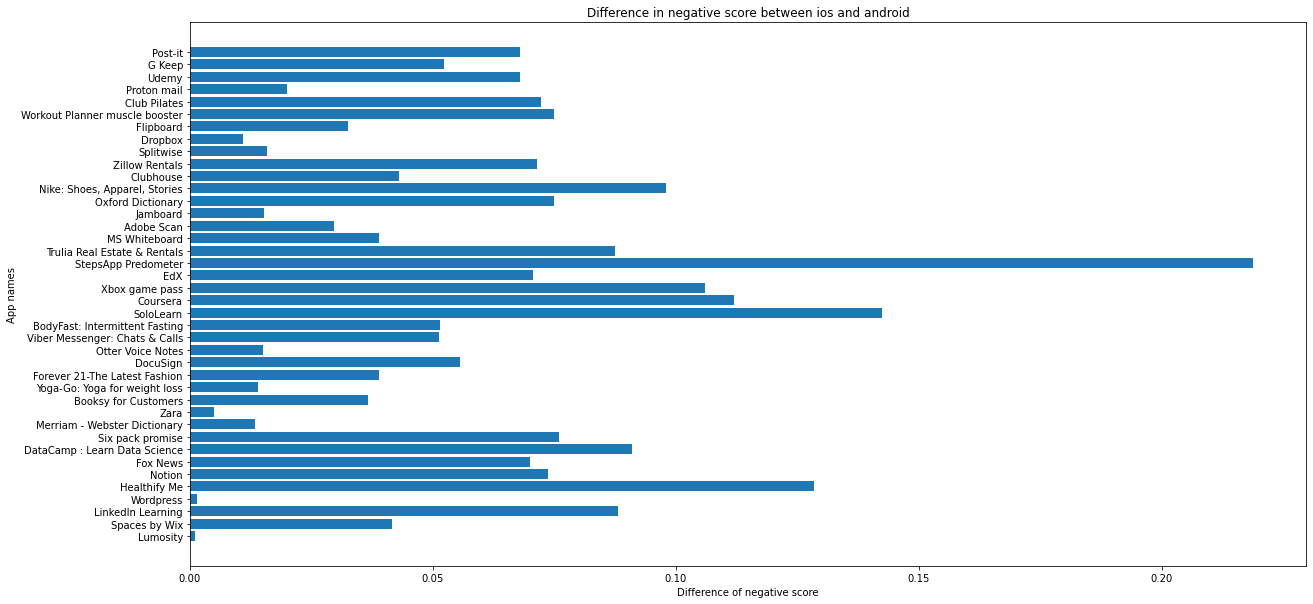

In [19]:

y = appNames
fig = plt.subplots(figsize =(20, 10))
# fig=figure(facecolor='w//hite')
# getting values against each value of y
x = differenceDF["Neg score diff"].to_numpy()
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("App names")
 
# setting label of x-axis
plt.xlabel("Difference of negative score")
plt.title("Difference in negative score between ios and android")
plt.savefig("negScoreDif.jpg")
plt.show()


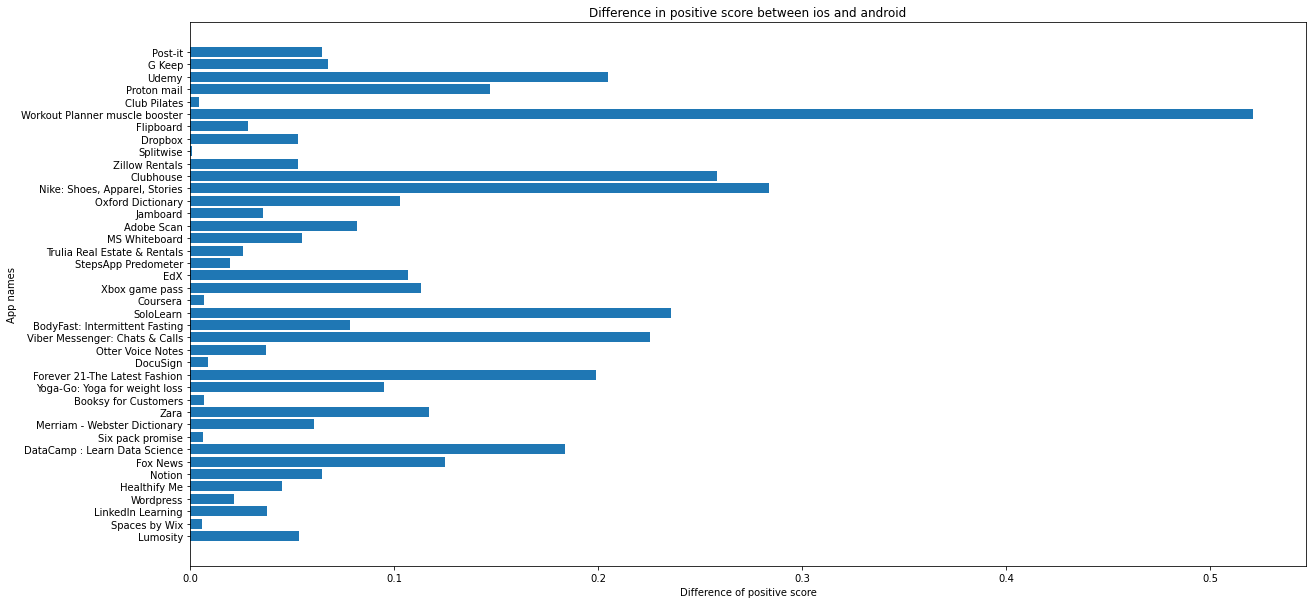

In [20]:
y = appNames
fig = plt.subplots(figsize =(20, 10))
# fig=figure(facecolor='w//hite')
# getting values against each value of y
x = differenceDF["Pos score diff"].to_numpy()
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("App names")
 
# setting label of x-axis
plt.xlabel("Difference of positive score")
plt.title("Difference in positive score between ios and android")
plt.savefig("posScoreDif.jpg")
plt.show()

In [29]:
# Aggregation of categories
categories = set(resultDF['Category'])
categorySummary = df.Dataframe()

NameError: name 'df' is not defined

In [ ]:
for category in categories:
    currentCat = resultDF[resultDF['Category'] == category]